<a href="https://colab.research.google.com/github/Thasneem-vazim/Depression-detection-with-15-features-with-and-without-using-DR-techniques/blob/main/Without_using_dimensionality_reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [71]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt 
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import plotly.express as px
np.random.seed(13)
file=pd.read_csv("/content/Copy of Survey (Responses) - Form Responses 1 (2).csv")
x=file[["1) Sadness","2) Discouragement","3) Low self-esteem","4) Inferiority","5) Guilt","6) Indecisiveness","7) Irritability","8) Loss of interest in life","9) Loss of motivation","10) Poor self-image","11) Appetite changes","12) Sleep changes","13) Loss of positivity","14) Hypochondriasis","15) Suicidal impulses"]]
y=file["Class"]

In [2]:
print(file.shape)

(206, 22)


In [3]:
file.describe()

,1) Sadness,2) Discouragement,3) Low self-esteem,4) Inferiority,5) Guilt,6) Indecisiveness,7) Irritability,8) Loss of interest in life,9) Loss of motivation,10) Poor self-image,11) Appetite changes,12) Sleep changes,13) Loss of positivity,14) Hypochondriasis,15) Suicidal impulses,Total
count,206.000000,206.000000,206.000000,206.000000,206.00000,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000
mean,1.368932,1.092233,1.024272,1.242718,1.26699,1.412621,1.223301,0.995146,1.330097,1.194175,1.092233,1.218447,1.014563,1.097087,0.747573,17.300971
std,0.632306,1.000604,0.975001,0.941882,0.95334,0.877711,0.936335,0.955077,0.909445,1.045858,0.975924,1.029255,0.944706,0.872502,0.891351,8.785615
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,1.000000,1.00000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000
50%,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,18.000000
75%,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,23.000000
max,2.000000,3.000000,3.000000,3.000000,3.00000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,44.000000


In [4]:
ig = px.pie(pd.DataFrame(file['Gender'].value_counts()), 
                            values='Gender', 
                            names=['Male','Female'],
                            title='Gender Count',
                            color='Gender',
                            color_discrete_map={'Male':'violet', 'Female':'pink'}
                            )
ig.show()

Text(0, 0.5, 'Frequency')

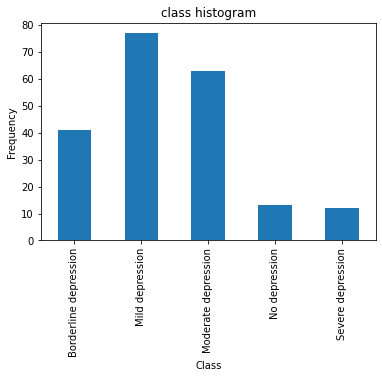

In [5]:
count_classes = pd.value_counts(file['Class'], sort = True).sort_index()
count_classes.plot(kind = 'bar')
plt.title("class histogram")
plt.xlabel("Class")
plt.ylabel("Frequency")

In [72]:
from sklearn.preprocessing import LabelEncoder
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)

In [73]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,stratify=y,test_size=0.2)

In [8]:
from sklearn.tree import DecisionTreeRegressor 
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(x_train, y_train)

DecisionTreeRegressor(random_state=0)

In [9]:
prediction=regressor.predict(x_test)
print('Accuracy = ', metrics.accuracy_score(y_test, prediction)*100)

Accuracy =  78.57142857142857


              precision    recall  f1-score   support

           0       0.71      0.62      0.67         8
           1       0.78      0.88      0.82        16
           2       0.92      0.85      0.88        13
           3       0.50      0.33      0.40         3
           4       0.67      1.00      0.80         2

    accuracy                           0.79        42
   macro avg       0.72      0.74      0.71        42
weighted avg       0.78      0.79      0.78        42



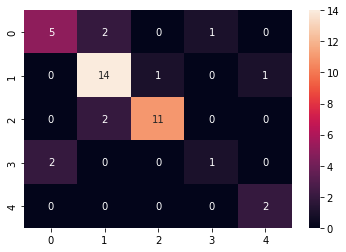

In [10]:
from sklearn.metrics import classification_report,confusion_matrix
y6_predict_test=regressor.predict(x_test)
cm1=confusion_matrix(y_test,y6_predict_test)
import seaborn as sns
sns.heatmap(cm1,annot=True)
print(classification_report(y_test,y6_predict_test))


In [11]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

In [12]:
from sklearn.svm import SVC
SVM=SVC()
SVM.fit(x_train,y_train)

SVC()

              precision    recall  f1-score   support

           0       0.62      1.00      0.76         8
           1       0.92      0.75      0.83        16
           2       1.00      0.92      0.96        13
           3       1.00      0.67      0.80         3
           4       1.00      1.00      1.00         2

    accuracy                           0.86        42
   macro avg       0.91      0.87      0.87        42
weighted avg       0.90      0.86      0.86        42



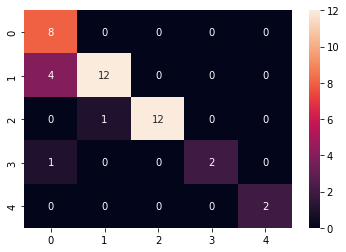

In [13]:
from sklearn.metrics import classification_report,confusion_matrix
y1_predict_test=SVM.predict(x_test)
cm1=confusion_matrix(y_test,y1_predict_test)
import seaborn as sns
sns.heatmap(cm1,annot=True)
print(classification_report(y_test,y1_predict_test))


In [14]:
prediction=SVM.predict(x_test)
print('Accuracy = ', metrics.accuracy_score(y_test, prediction)*100)

Accuracy =  85.71428571428571


In [15]:
from sklearn.naive_bayes import MultinomialNB
NB=MultinomialNB()
NB.fit(x_train,y_train)

MultinomialNB()

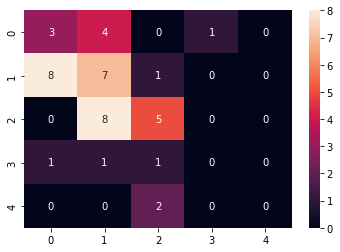

In [16]:
y2_predict_test=NB.predict(x_test)
cm2=confusion_matrix(y_test,y2_predict_test)
sns.heatmap(cm2,annot=True)

In [17]:
print(classification_report(y_test,y2_predict_test))

              precision    recall  f1-score   support

           0       0.25      0.38      0.30         8
           1       0.35      0.44      0.39        16
           2       0.56      0.38      0.45        13
           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         2

    accuracy                           0.36        42
   macro avg       0.23      0.24      0.23        42
weighted avg       0.35      0.36      0.35        42



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [18]:
from sklearn.naive_bayes import BernoulliNB
BNBmodel = BernoulliNB()
BNBmodel.fit(x_train, y_train)


BernoulliNB()

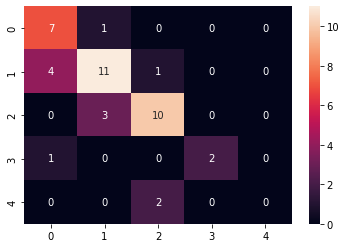

In [19]:
y3_predict_test=BNBmodel.predict(x_test)
cm1=confusion_matrix(y_test,y3_predict_test)
sns.heatmap(cm1,annot=True)

In [74]:
#3. Defining the model - Input and Hidden Layer Construction 
from tensorflow import keras
model_dnn = keras.models.Sequential()
model_dnn.add(keras.layers.Dense(units = 12, activation = 'relu',input_shape= x_train.shape[1:]))
model_dnn.add(keras.layers.Dense(units = 10, activation = 'relu')) 
model_dnn.add(keras.layers.Dense(units = 8, activation = 'relu')) 
model_dnn.add(keras.layers.Dense(units = 6, activation = 'relu')) 
model_dnn.add(keras.layers.Dense(units = 6, activation = 'relu'))
model_dnn.add(keras.layers.Dense(units = 3, activation = 'softmax'))
model_dnn.summary()

#4 Compile the model and fit the data into model 
model_dnn.compile(loss= 'categorical_crossentropy',optimizer = 'adam' , metrics = ['accuracy'])
model_dnn.fit(x=x_train , y =y_train , validation_split = 0.1 , epochs =5, batch_size = 16)

#5 Evaluating the model 
testloss,testaccuracy=model_dnn.evaluate(x_test,y_test) 
print("Test loss observed on iris dataset = ",testloss) 
print("Test accuracy observed on iris dataset = ",testaccuracy)

x

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 12)                192       
                                                                 
 dense_19 (Dense)            (None, 10)                130       
                                                                 
 dense_20 (Dense)            (None, 8)                 88        
                                                                 
 dense_21 (Dense)            (None, 6)                 54        
                                                                 
 dense_22 (Dense)            (None, 6)                 42        
                                                                 
 dense_23 (Dense)            (None, 3)                 21        
                                                                 
Total params: 527
Trainable params: 527
Non-trainable 

ValueError: ignored

In [20]:
print(classification_report(y_test,y3_predict_test))

              precision    recall  f1-score   support

           0       0.58      0.88      0.70         8
           1       0.73      0.69      0.71        16
           2       0.77      0.77      0.77        13
           3       1.00      0.67      0.80         3
           4       0.00      0.00      0.00         2

    accuracy                           0.71        42
   macro avg       0.62      0.60      0.60        42
weighted avg       0.70      0.71      0.70        42



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [21]:
prediction=BNBmodel.predict(x_test)
print('Accuracy = ', metrics.accuracy_score(y_test, prediction)*100)

Accuracy =  71.42857142857143


In [22]:
from sklearn.tree import DecisionTreeClassifier
DT=DecisionTreeClassifier()
DT=DT.fit(x_train,y_train)

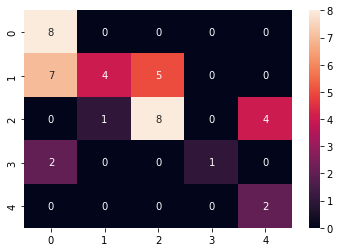

In [23]:
y4_predict_test=DT.predict(x_test)
cm4=confusion_matrix(y_test,y4_predict_test)
sns.heatmap(cm4,annot=True)

In [24]:
print(classification_report(y_test,y4_predict_test))

              precision    recall  f1-score   support

           0       0.47      1.00      0.64         8
           1       0.80      0.25      0.38        16
           2       0.62      0.62      0.62        13
           3       1.00      0.33      0.50         3
           4       0.33      1.00      0.50         2

    accuracy                           0.55        42
   macro avg       0.64      0.64      0.53        42
weighted avg       0.67      0.55      0.52        42



In [25]:
prediction=DT.predict(x_test)
print('Accuracy = ', metrics.accuracy_score(y_test, prediction)*100)

Accuracy =  54.761904761904766


In [26]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(n_estimators = 100)
RF.fit(x_train, y_train)

RandomForestClassifier()

In [27]:
prediction=RF.predict(x_test)
print('Accuracy = ', metrics.accuracy_score(y_test, prediction)*100)


Accuracy =  83.33333333333334


              precision    recall  f1-score   support

           0       0.67      1.00      0.80         8
           1       0.87      0.81      0.84        16
           2       0.92      0.85      0.88        13
           3       1.00      0.33      0.50         3
           4       1.00      1.00      1.00         2

    accuracy                           0.83        42
   macro avg       0.89      0.80      0.80        42
weighted avg       0.86      0.83      0.83        42



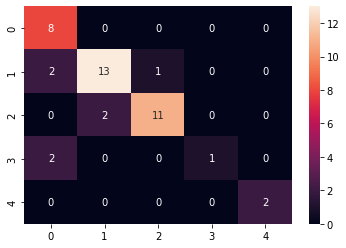

In [28]:
y5_predict_test=RF.predict(x_test)
cm4=confusion_matrix(y_test,y5_predict_test)
sns.heatmap(cm4,annot=True)
print(classification_report(y_test,y5_predict_test))

In [29]:
prediction=RF.predict(x_test)
print('Accuracy = ', metrics.accuracy_score(y_test, prediction)*100)

Accuracy =  83.33333333333334


In [59]:
from xgboost import XGBClassifier
import xgboost as xgb
params = {
 'objective':'multi:softmax',
 'max_depth': 2, 'min_child_weight': 2, 'gamma': 0.3, 'subsample': 0.6,
 'colsample_bytree': 0.6, 'scale_pos_weight': 1,
 'alpha': 0.05,
 'learning_rate': 0.03,
 'n_estimators':1484,'seed': 27
 }
xgb_clf = XGBClassifier(**params)
xgb_clf.fit(x_train,y_train)

XGBClassifier(alpha=0.05, colsample_bytree=0.6, gamma=0.3, learning_rate=0.03,
              max_depth=2, min_child_weight=2, n_estimators=1484,
              objective='multi:softprob', seed=27, subsample=0.6)

              precision    recall  f1-score   support

           0       0.70      0.88      0.78         8
           1       0.86      0.75      0.80        16
           2       0.92      0.92      0.92        13
           3       0.67      0.67      0.67         3
           4       1.00      1.00      1.00         2

    accuracy                           0.83        42
   macro avg       0.83      0.84      0.83        42
weighted avg       0.84      0.83      0.83        42



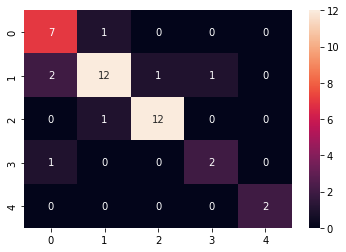

In [60]:
yxg_pred=xgb_clf.predict(x_test)
cm4=confusion_matrix(y_test,yxg_pred)
sns.heatmap(cm4,annot=True)
print(classification_report(y_test,yxg_pred))

In [61]:
print(classification_report(y_test,yxg_pred))

              precision    recall  f1-score   support

           0       0.70      0.88      0.78         8
           1       0.86      0.75      0.80        16
           2       0.92      0.92      0.92        13
           3       0.67      0.67      0.67         3
           4       1.00      1.00      1.00         2

    accuracy                           0.83        42
   macro avg       0.83      0.84      0.83        42
weighted avg       0.84      0.83      0.83        42



In [62]:
prediction=xgb_clf.predict(x_test)
print('Accuracy = ', metrics.accuracy_score(y_test, prediction)*100)

Accuracy =  83.33333333333334


In [34]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(x_train, y_train)


KNeighborsClassifier(n_neighbors=1)

              precision    recall  f1-score   support

           0       0.57      1.00      0.73         8
           1       0.62      0.62      0.62        16
           2       0.88      0.54      0.67        13
           3       1.00      0.67      0.80         3
           4       1.00      1.00      1.00         2

    accuracy                           0.69        42
   macro avg       0.81      0.77      0.76        42
weighted avg       0.74      0.69      0.69        42



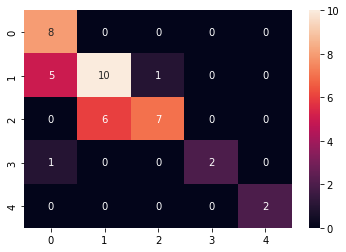

In [35]:
y6_pred=knn.predict(x_test)
cm4=confusion_matrix(y_test,y6_pred)
sns.heatmap(cm4,annot=True)
print(classification_report(y_test,y6_pred))

In [36]:
print(classification_report(y_test,y6_pred))

              precision    recall  f1-score   support

           0       0.57      1.00      0.73         8
           1       0.62      0.62      0.62        16
           2       0.88      0.54      0.67        13
           3       1.00      0.67      0.80         3
           4       1.00      1.00      1.00         2

    accuracy                           0.69        42
   macro avg       0.81      0.77      0.76        42
weighted avg       0.74      0.69      0.69        42



In [37]:
prediction=knn.predict(x_test)
print('Accuracy = ', metrics.accuracy_score(y_test, prediction)*100)

Accuracy =  69.04761904761905


In [39]:
from sklearn.ensemble import AdaBoostClassifier
ADABoostClassification=AdaBoostClassifier()
ADABoostClassification.fit(x_train,y_train)

AdaBoostClassifier()

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



              precision    recall  f1-score   support

           0       0.50      0.50      0.50         8
           1       0.46      0.69      0.55        16
           2       0.67      0.31      0.42        13
           3       0.00      0.00      0.00         3
           4       0.50      1.00      0.67         2

    accuracy                           0.50        42
   macro avg       0.42      0.50      0.43        42
weighted avg       0.50      0.50      0.47        42



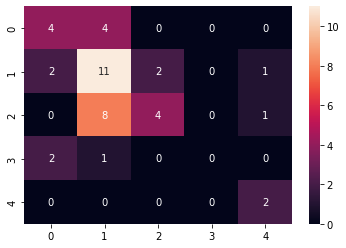

In [42]:
y_predictionADABoost=ADABoostClassification.predict(x_test)
from sklearn.metrics import classification_report,confusion_matrix
y_predict_test=ADABoostClassification.predict(x_test)
cm1=confusion_matrix(y_test,y_predict_test)
import seaborn as sns
sns.heatmap(cm1,annot=True)
print(classification_report(y_test,y_predict_test))



In [44]:
prediction=ADABoostClassification.predict(x_test)
print('Accuracy = ', metrics.accuracy_score(y_test, prediction)*100)

Accuracy =  50.0


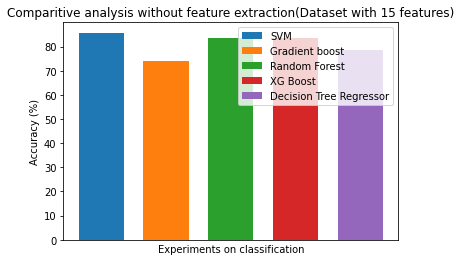

In [75]:
# Import Library
import numpy as np 
import matplotlib.pyplot as plt 

# Define Data
data3 = ['Before feature Extraction']
xvals = [85.71]
yvals = [73.8]
zvals = [83.33]
avals = [83.33]
bvals = [78.5]

x_axis = np.arange(len(data3))

# Multi bar Chart
plt.bar(x_axis +0.1, xvals, width=0.07, label = 'SVM')
plt.bar(x_axis +0.1*2, yvals, width=0.07, label = 'Gradient boost')
plt.bar(x_axis +0.1*3, zvals, width=0.07, label = 'Random Forest')
plt.bar(x_axis +0.1*4, avals, width=0.07, label = 'XG Boost')
plt.bar(x_axis +0.1*5, bvals, width=0.07, label = 'Decision Tree Regressor')

# Xticks
plt.xticks(x_axis,data3)
plt.ylabel("Accuracy (%)")
plt.xlabel("Experiments on classification")
plt.title("Comparitive analysis without feature extraction(Dataset with 15 features)")
plt.legend()
plt.show()

In [46]:
from sklearn.ensemble import GradientBoostingClassifier
GradeintBoostClassification = GradientBoostingClassifier(loss='deviance',max_features=1,random_state=0,max_leaf_nodes=None)
GradeintBoostClassification.fit(x_train,y_train)
y_predictionGradient=GradeintBoostClassification.predict(x_test)



In [48]:
prediction=GradeintBoostClassification.predict(x_test)
print('Accuracy = ', metrics.accuracy_score(y_test, prediction)*100)

Accuracy =  73.80952380952381


In [49]:
!pip install pytorch-tabnet
from pytorch_tabnet.tab_model import TabNetClassifier
import torch

# define the model
model_tabnet = TabNetClassifier(optimizer_fn=torch.optim.Adam,
                       optimizer_params=dict(lr=1e-2),
                       scheduler_params={"step_size":10,"gamma":0.9},
                       scheduler_fn=torch.optim.lr_scheduler.StepLR,
                       mask_type='entmax')


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Device used : cpu


In [52]:
model_tabnet.fit(x_train,y_train, eval_set=[(x_train, y_train), (x_test, y_test)],eval_name=['train', 'valid'],eval_metric=['auc','accuracy'], max_epochs=20 , patience=50, batch_size=256, virtual_batch_size=128, num_workers=0, weights=1)   
y_pred_TabNet = model_tabnet.predict(x_test)
print(y_pred_TabNet)

KeyError: ignored

In [54]:
prediction=BNBmodel.predict(x_test)
print('Accuracy = ', metrics.accuracy_score(y_test, y3_predict_test)*100)

Accuracy =  71.42857142857143


In [56]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neural_network import MLPClassifier

base_cls = MLPClassifier(random_state=0)
num_trees = 300
seed = 15
# bagging classifier
bagClassificationMLP = BaggingClassifier(base_estimator=base_cls, n_estimators=num_trees, random_state=0)
bagClassificationMLP.fit(x_train, y_train)
y_predictionBagMLP = bagClassificationMLP.predict(x_test)


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

In [58]:
prediction=bagClassificationMLP.predict(x_test)
print('Accuracy = ', metrics.accuracy_score(y_test, prediction)*100)

Accuracy =  66.66666666666666


In [53]:
from sklearn.naive_bayes import BernoulliNB
BNBmodel = BernoulliNB()
BNBmodel.fit(x_train, y_train)

BernoulliNB()